In [158]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

from sklearn.linear_model import LinearRegression

In [159]:
df = pd.read_csv("dogrusal_regresyon_veriseti.csv", sep=";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


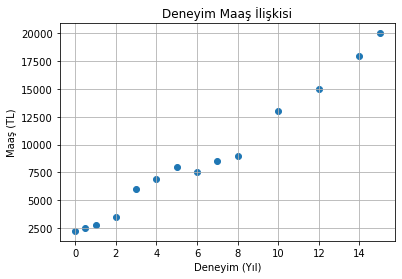

In [160]:
plt.scatter(df.deneyim,df.maas)
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [161]:
linearReg = LinearRegression()

x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

linearReg.fit(x,y)

LinearRegression()

In [162]:
# y_ekseni = np.array([0]).reshape(1,-1) alternatif çözüm
# b = linearReg.predict(y_ekseni)

# print("b: ",b)

b0 = linearReg.intercept_ # kestiği nokta
print("b0: ",b0)

b1 = linearReg.coef_ # eğim
print("b1: ",b1)

b0:  [1663.89519747]
b1:  [[1138.34819698]]


In [163]:
deneyim = 5

maas_yeni = 1663 + 1138*deneyim
print(maas_yeni)

sonuc = linearReg.predict(np.array([deneyim]).reshape(1,-1)) #alternatif çözüm
print("5 yıllık deneyim maaşı: {} ".format(sonuc[0]) )

7353
5 yıllık deneyim maaşı: [7355.63618235] 


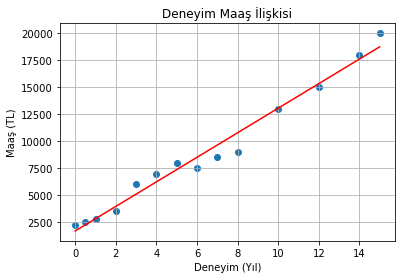

In [164]:
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)

plt.figure()
plt.scatter(x,y)


y_head =linearReg.predict(array)

plt.plot(array, y_head, color = "red")
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

### Çoklu Doğrusal Regresyon

In [165]:
#Çoklu Doğrusal Regresyon

df = pd.read_csv("coklu_dogrusal_regresyon_veriseti.csv", sep=";")
df.head()

,deneyim,maas,yas
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [166]:
x = df.iloc[:,[0,2]].values # deneyim ve yaş bağımsız değişkenler
x

array([[ 0.5, 22. ],
       [ 0. , 21. ],
       [ 1. , 23. ],
       [ 5. , 25. ],
       [ 8. , 28. ],
       [ 4. , 23. ],
       [15. , 35. ],
       [ 7. , 29. ],
       [ 3. , 22. ],
       [ 2. , 23. ],
       [12. , 32. ],
       [10. , 30. ],
       [14. , 34. ],
       [ 6. , 27. ]])

In [167]:
y = df.maas.values.reshape(-1,1)
y

array([[ 2500],
       [ 2250],
       [ 2750],
       [ 8000],
       [ 9000],
       [ 6900],
       [20000],
       [ 8500],
       [ 6000],
       [ 3500],
       [15000],
       [13000],
       [18000],
       [ 7500]], dtype=int64)

In [168]:
cokluDogReg = LinearRegression()
cokluDogReg.fit(x,y)

LinearRegression()

In [169]:
test_verisi = np.array([[5,25]]) #deneyim: 5 yaş 25
test_sonucu = cokluDogReg.predict(test_verisi)
print("5 Yıllık deneyim 25 yaş: {} TL".format(test_sonucu))

5 Yıllık deneyim 25 yaş: [[7586.07641862]] TL


In [170]:
test_verisi2 = np.array([[7,28]]) #deneyim: 7 yaş 28
test_sonucu2 = cokluDogReg.predict(test_verisi2)
print("7 Yıllık deneyim 28 yaş: {} TL".format(test_sonucu2))

7 Yıllık deneyim 28 yaş: [[9386.91130093]] TL


### Polinomsal Regresyon

In [171]:
from sklearn.preprocessing import PolynomialFeatures #polinomsal

In [172]:
df = pd.read_csv("polinomsal_regresyon_veriseti.csv", sep=";")
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [173]:
y = df.araba_max_hiz.values.reshape(-1,1)
x = df.araba_fiyat.values.reshape(-1,1)

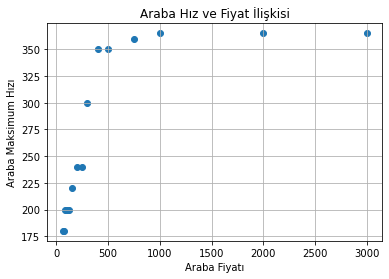

In [174]:
plt.scatter(x,y)
plt.ylabel("Araba Maksimum Hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

In [175]:
lReg = LinearRegression()
lReg.fit(x,y)

LinearRegression()

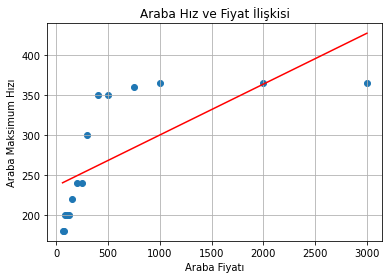

10 bin tl lik araba hizi tahmini:  [[871.66401826]]


In [176]:
y_tahmin = lReg.predict(x)

plt.scatter(x,y)
plt.plot(x,y_tahmin,color="red")
plt.ylabel("Araba Maksimum Hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

araba_fiyatı = 10000
print("10 bin tl lik araba hizi tahmini: ",lReg.predict((np.array([araba_fiyatı]).reshape(1,-1)))) # model yanlış

In [177]:
polinom_regresyon = PolynomialFeatures(degree = 4)

x_polinom = polinom_regresyon.fit_transform(x)
x_polinom

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [178]:
lReg2 = LinearRegression()
lReg2.fit(x_polinom,y)

LinearRegression()

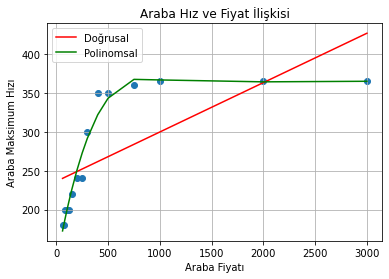

In [179]:
y_tahmin2 = lReg2.predict(x_polinom)

plt.scatter(x,y)
plt.plot(x,y_tahmin,color="red",label = "Doğrusal")
plt.plot(x,y_tahmin2,color="green",label = "Polinomsal")
plt.legend()
plt.ylabel("Araba Maksimum Hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()


### Regresyon Modellerin Değerlendirilmesi

In [180]:
from sklearn.metrics import r2_score # r kare

In [181]:
df = pd.read_csv("dogrusal_regresyon_veriseti.csv", sep=";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


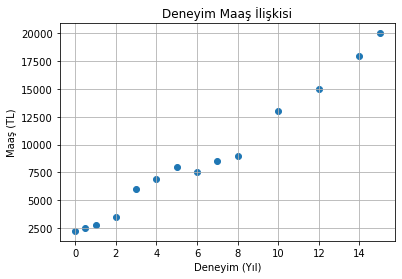

In [182]:
plt.scatter(df.deneyim,df.maas)
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [183]:
x= df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

In [184]:
linearReg= LinearRegression()
linearReg.fit(x,y)

LinearRegression()

In [185]:
polinomReg =PolynomialFeatures(degree = 2)

x_polinom =polinom_regresyon.fit_transform(x)

poly_reg = LinearRegression()
poly_reg.fit(x_polinom,y)

LinearRegression()

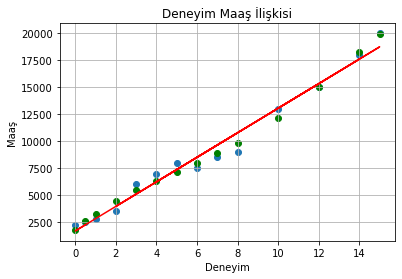

In [186]:
y_tahminLinear = linearReg.predict(x)
y_tahminPoly = poly_reg.predict(x_polinom)

plt.scatter(df.deneyim, df.maas)
plt.plot(x, y_tahminLinear,color="red" , label="Doğrusal")
plt.scatter(x, y_tahminPoly,color="green" , label="Polinomsal")
plt.xlabel("Deneyim")
plt.ylabel("Maaş")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [187]:
print("Doğrusal Regresyon R kare {}", r2_score(y,y_tahminLinear))
print("Polinomsal Regresyon R kare {}",r2_score(y,y_tahminPoly))


Doğrusal Regresyon R kare {} 0.9775283164949902
Polinomsal Regresyon R kare {} 0.9892264139752605


### Lojistik Regresyon

In [188]:
warnings.filterwarnings("ignore") # uyarıları kapat

In [189]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikler.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


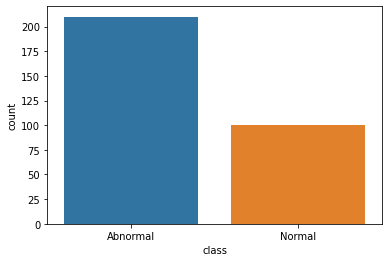

In [190]:
sns.countplot(data["class"]) # abnormal normal 2 sınıf mevcut
plt.show()

In [191]:
data["class"] = [1 if each =="Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [192]:
data.info() #sayısal değişkenlerden oluşan veri seti

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [193]:
y= data["class"].values
x_data = data.drop(["class"],axis=1)

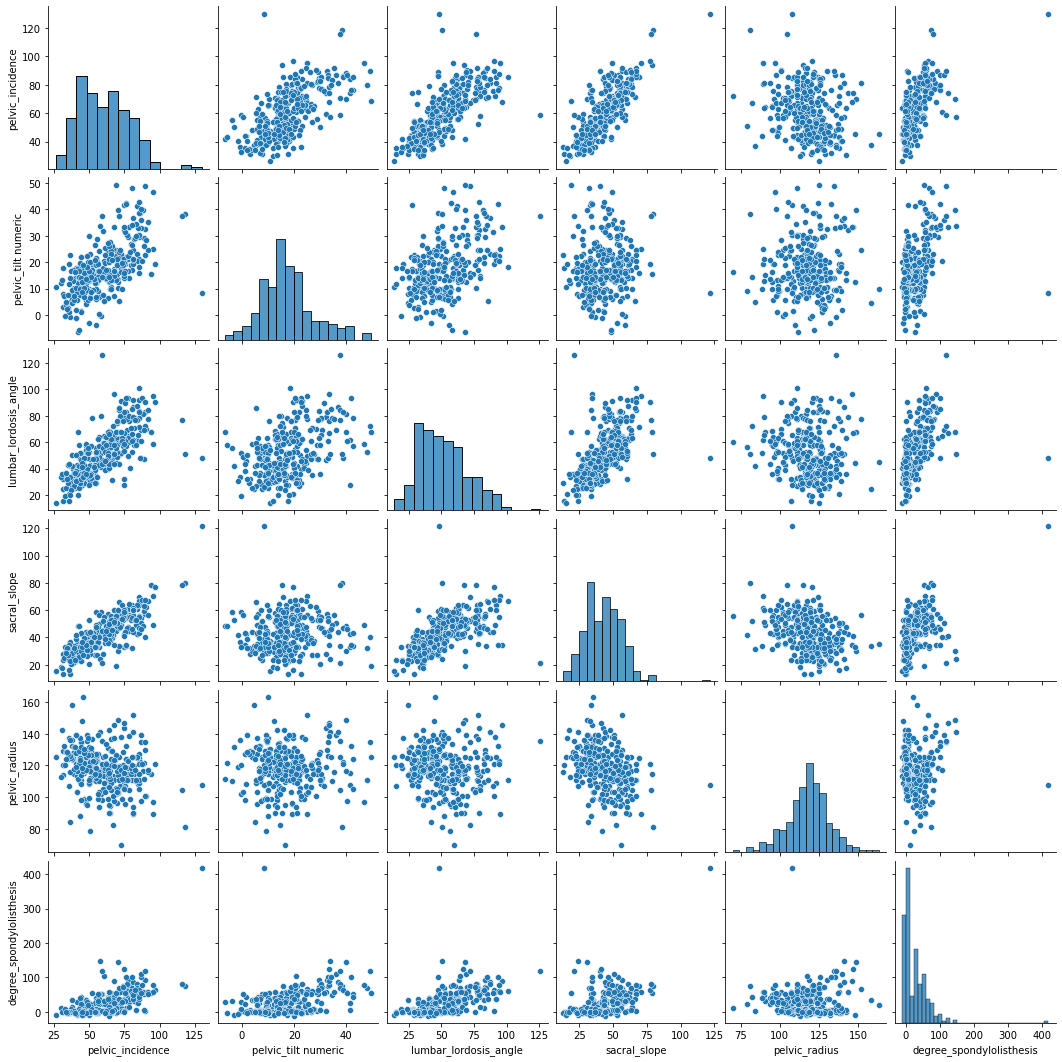

In [194]:
sns.pairplot(x_data) # verinin içerisinde bulunan özelliklerin birbirisi ile ilişkileri
plt.show()

### Veriyi Normalize Etmek

In [195]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values # x-min(x)/max(x)-min(x)

### Eğitim/Test Bölünmesi

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size= 0.15,random_state=42)

In [198]:
# transpoze alıyoruz
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (6, 263)
x_test (6, 47)
y_train (263,)
y_test (47,)


### Sklearn ile Lojistik Regresyon Model Eğitim ve Testi

In [199]:
from sklearn.linear_model import LogisticRegression

In [200]:
logisticReg = LogisticRegression()
logisticReg.fit(x_train.T, y_train.T)

LogisticRegression()

In [201]:
test_dogrulugu = logisticReg.score(x_test.T,y_test.T)
print("Test Doğruluğu {}".format(test_dogrulugu))

Test Doğruluğu 0.7872340425531915


### K-En Yakın Komşu

In [202]:
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1


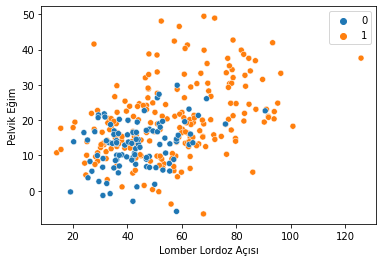

In [203]:
sns.scatterplot(data=data, x="lumbar_lordosis_angle", y="pelvic_tilt numeric",hue="class")
plt.xlabel("Lomber Lordoz Açısı")
plt.ylabel("Pelvik Eğim")
plt.legend()
plt.show()

In [204]:
## K-En Yakın Komşu algoritması için zor bir problem olabilir çünkü 2 boyutta iç içe geçmişler

In [205]:
#knn model 
from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi= 4
knn = KNeighborsClassifier(n_neighbors= komsu_sayisi)
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)
print("{} En Yakın Komşu Modeli Test Doğruluk: {}".format(komsu_sayisi,knn.score(x_test,y_test)))

ValueError: Found input variables with inconsistent numbers of samples: [6, 263]